# Logistic regression

## Importing libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Types of logistic regression:
- Binary logistic regression
- Multinomial logistic regression
- One-vs-Rest logistic regression

## Assumptions of logistic regression
1. The dependent variable must be categorical.
2. The independent variable must be independent of each other.
3. There should be no outliers in the data.

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix,classification_report

In [34]:
# data import
df=sns.load_dataset('titanic')

## Preprocess the data

In [35]:
df.drop(['deck','embark_town','alive'],axis=1,inplace=True)

In [36]:
df['age'].fillna(df['age'].median(),inplace=True)
df['fare'].fillna(df['fare'].median(),inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0],inplace=True)

# Encoding the categorical columns
le=LabelEncoder()
for i in df.columns:
    if df[i].dtype=='object' or df[i].dtype=='category':
        df[i]=le.fit_transform(df[i])


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    int32  
 3   age         891 non-null    float64
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   embarked    891 non-null    int32  
 8   class       891 non-null    int32  
 9   who         891 non-null    int32  
 10  adult_male  891 non-null    bool   
 11  alone       891 non-null    bool   
dtypes: bool(2), float64(2), int32(4), int64(4)
memory usage: 57.6 KB


In [38]:
X=df.drop('survived',axis=1)
y=df['survived']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
model=LogisticRegression()
model.fit(X_train,y_train)

c:\Users\ATECH\.conda\envs\python_ml\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
# Prediction
y_pred=model.predict(X_test)
# Accuracy
print('Accuracy:',accuracy_score(y_test,y_pred))
# Recall
print('Recall:',recall_score(y_test,y_pred))
# Precision
print('Precision:',precision_score(y_test,y_pred))
# F1 Score
print('F1 Score:',f1_score(y_test,y_pred))
# Confusion Matrix
print('Confusion Matrix:',confusion_matrix(y_test,y_pred))
# Classification Report
print('Classification Report:\n',classification_report(y_test,y_pred))


Accuracy: 0.8100558659217877
Recall: 0.7432432432432432
Precision: 0.7857142857142857
F1 Score: 0.7638888888888888
Confusion Matrix: [[90 15]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



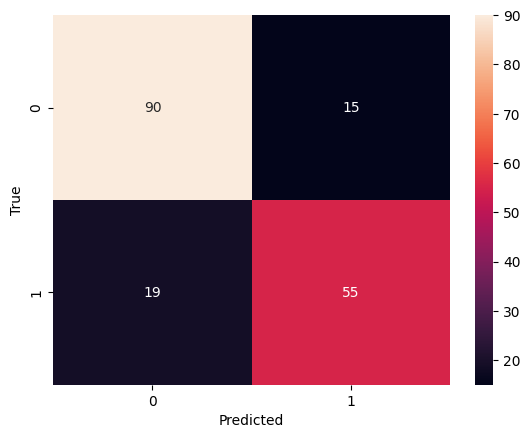

In [42]:
 # Confusion Matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()